In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import json
import numpy as np
from scipy.io import wavfile
import librosa
import pysynth
import pysynth_b
import pysynth_e
import math

Piano key frequencies (for equal temperament):
Key number	Scientific name	Frequency (Hz)
         1	             A0	         27.50
         2	            A#0	         29.14
         3	             B0	         30.87
         4	             C1	         32.70
         5	            C#1	         34.65
         6	             D1	         36.71
         7	            D#1	         38.89
         8	             E1	         41.20
         9	             F1	         43.65
        10	            F#1	         46.25
        11	             G1	         49.00
        12	            G#1	         51.91
        13	             A1	         55.00
        14	            A#1	         58.27
        15	             B1	         61.74
        16	             C2	         65.41
        17	            C#2	         69.30
        18	             D2	         73.42
        19	            D#2	         77.78
        20	             E2	         82.41
        21	             F2	         87.31
        22	            F#2	  

In [7]:
with open('metadata.json') as json_file:  
    metadata = json.load(json_file)

In [8]:
for i in range(12):
    print(metadata['files'][i]['dur'])

7.396871223373166
7.396871223373166
7.396871223373166
2.025294698089252
2.025294698089252
2.025294698089252
5.497888439914206
5.497888439914206
5.497888439914206
2.865613861779508
2.865613861779508
2.865613861779508


In [17]:
def extract_feature(file_name):
    
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    
    return np.hstack((mfccs,chroma,mel,contrast,tonnetz))

In [18]:
feat = extract_feature('jaishriram.wav')
print(len(feat))

193


In [19]:
with open('metadata.json') as json_file:  
    metadata = json.load(json_file)
notes = ['a0', 'a#0', 'b0', 'c1', 'c#1', 'd1', 'd#1', 'e1', 'f1', 'f#1', 'g1', 'g#1', 'a1', 'a#1', 'b1', 'c2', 'c#2', 'd2', 'd#2', 'e2', 'f2', 'f#2', 'g2', 'g#2', 'a2', 'a#2', 'b2', 'c3', 'c#3', 'd3', 'd#3', 'e3', 'f3', 'f#3', 'g3', 'g#3', 'a3', 'a#3', 'b3', 'c4', 'c#4', 'd4', 'd#4', 'e4', 'f4', 'f#4', 'g4', 'g#4', 'a4', 'a#4', 'b4', 'c5', 'c#5', 'd5', 'd#5', 'e5', 'f5', 'f#5', 'g5', 'g#5', 'a5', 'a#5', 'b5', 'c6', 'c#6', 'd6', 'd#6', 'e6', 'f6', 'f#6', 'g6', 'g#6', 'a6', 'a#6', 'b6', 'c7', 'c#7', 'd7', 'd#7', 'e7', 'f7', 'f#7', 'g7', 'g#7', 'a7', 'a#7', 'b7', 'c8']
dic ={}
for i in range(len(notes)):
    dic[notes[i]]=i
    
    
X = np.zeros((len(metadata['files']),193))
Y = np.zeros((len(metadata['files']),2))


for i in range(len(metadata['files'])):
    file = metadata['files'][i]['name']
    X[i,:] = extract_feature(file)
#     fs, data = wavfile.read(file)
#     X[i][0] = ord(metadata['files'][i]['synth'][-1])-97
    
#     w=0
#     while(w<len(data)-50):
#         fl = 0
#         for j in range(50):
#             if(math.fabs(data[w+j])>5):
#                 fl = 1
#                 break
#         if(fl==0):
#             break
#         w=w+1
        
        
#     if(len(data)>=44100):
#         X[i][1:-1] = data[:44100]
#     else:
#         X[i][1:-1] = np.array(list(data[:])+[0]*(44100-len(data)))    
        
#     X[i][-1]=w    
    
    
    note = dic[metadata['files'][i]['notes'][0]]
    dur = metadata['files'][i]['dur']
    Y[i][0]=note
    Y[i][1]=dur

c:\users\deban\appdata\local\programs\python\python37\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [20]:
dic2 = {}
for i in range(len(notes)):
    dic2[i]=notes[i]
print(len(notes))


88


In [21]:
from sklearn.utils import shuffle
#X, Y = shuffle(X, Y, random_state=0)
print(X.shape,Y.shape)
Xtr, Xte, ytr, yte = train_test_split(X, Y, test_size = 0.2, random_state = 42)

(750, 193) (750, 2)


In [51]:
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
mlc = MLPClassifier()
mlr = MLPRegressor()

print("1")

mlc.fit(Xtr,ytr[:,0])

print("2")

mlr.fit(Xtr,ytr[:,1])

print("3")


1


c:\users\deban\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


2
3


c:\users\deban\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [55]:
print(mlc.score(Xte,yte[:,0]))
print(mlr.score(Xte,yte[:,1]))
print(mlr.score(Xtr,ytr[:,1]))

0.9666666666666667
0.33180272119954
0.7506001447827454


In [24]:
import pysynth as ps_a
import pysynth_b as ps_b
import pysynth_e as ps_e
import pysynth_s as ps_s

import random

basic_notes = ['a0', 'a#0', 'b0', 'c1', 'c#1', 'd1', 'd#1', 'e1', 'f1', 'f#1', 'g1', 'g#1', 'a1', 'a#1', 'b1', 'c2', 'c#2', 'd2', 'd#2', 'e2', 'f2', 'f#2', 'g2', 'g#2', 'a2', 'a#2', 'b2', 'c3', 'c#3', 'd3', 'd#3', 'e3', 'f3', 'f#3', 'g3', 'g#3', 'a3', 'a#3', 'b3', 'c4', 'c#4', 'd4', 'd#4', 'e4', 'f4', 'f#4', 'g4', 'g#4', 'a4', 'a#4', 'b4', 'c5', 'c#5', 'd5', 'd#5', 'e5', 'f5', 'f#5', 'g5', 'g#5', 'a5', 'a#5', 'b5', 'c6', 'c#6', 'd6', 'd#6', 'e6', 'f6', 'f#6', 'g6', 'g#6', 'a6', 'a#6', 'b6', 'c7', 'c#7', 'd7', 'd#7', 'e7', 'f7', 'f#7', 'g7', 'g#7', 'a7', 'a#7', 'b7', 'c8']

basic_synths = {ps_a: 'pysynth_a', ps_b: 'pysynth_b', ps_e: 'pysynth_e'}

def get_random_notes(size):
    basic_notes_len = len(basic_notes)
    notes = []
    for _ in range(size):
        random_index = random.randint(1, basic_notes_len - 1)
        random_note = basic_notes[random_index]
        notes.append(random_note)
    #print(notes)
    return notes


def generate_wavfile_from_notes(notes,dur):
    size = len(notes)  
    text = tuple(zip(notes, [dur]*size))
    print(text)
    c = 1
    for synth in basic_synths:
        file_name = "sound_"+str(c)+".wav"
        synth.make_wav(text, fn=file_name)
        print("file "+str(c)+" done")
        c=c+1

def make_sound_files(size,dur):
    notes = get_random_notes(size)
    print(notes)
    generate_wavfile_from_notes(notes,dur)
    return notes
    

In [25]:
notes = make_sound_files(1,3)

['g#6']
(('g#6', 3),)
Writing to file sound_1.wav
[1/1]	

file 1 done
[1/1]	
Writing to file sound_2.wav

file 2 done
[1/1]	
Writing to file sound_3.wav

file 3 done


In [26]:
print(notes)
note_nums=[dic[j] for j in notes]
print(note_nums)

['g#6']
[71]


In [27]:
def get_features(X,sample_rate):
    
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    
    return np.hstack((mfccs,chroma,mel,contrast,tonnetz))

In [28]:
file = 'sound_2.wav'
arr , fs = librosa.load(file)
test_samp = get_features(arr,fs)
ans = mlc.predict([test_samp])
print(ans)

[71.]


In [29]:
file = 'sound_1.wav'
arr , fs = librosa.load(file)
test_samp = get_features(arr,fs)
ans = mlc.predict([test_samp])
print(ans)

[71.]


In [45]:
nums = [dic[j] for j in ['f#5','b5','c#5','d5']]
print(nums)
tup = (('f#5',2),('b5',2),('c#5',2),('d5',2))
pysynth.make_wav(tup,fn = 'jaishriram.wav')

[57, 62, 52, 53]
Writing to file jaishriram.wav
[1/4]	



[    0 21504 22528 44544 65536 66560 87552]
7
22050


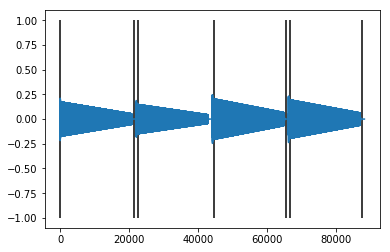

In [46]:
file = "jaishriram.wav"
arr , fs = librosa.load(file)
onset = np.array([0]+list(librosa.onset.onset_detect(y = arr, sr = fs, units = 'samples')))
print(onset)
print(len(onset))
print(fs)
plt.plot(list(range(len(arr))),arr)
plt.vlines(onset,-1,1)
plt.show()

In [53]:
pred = []
for i in range(len(onset)-1):
    t = arr[onset[i]:onset[i+1]]
    if(len(t)>4000):
        temp = get_features(t,fs)
        pred_note = mlc.predict([temp])
        pred_dur = mlr.predict([temp])
        pred.append([pred_note,pred_dur])
    
print(pred)

[[array([57.]), array([1.95509554])], [array([62.]), array([2.16402637])], [array([52.]), array([1.60644496])], [array([53.]), array([2.06135117])]]


In [54]:
tup = (('f#5',1.955),('b5',2.164),('c#5',1.606),('d5',2.061))
pysynth_e.make_wav(tup,fn = 'jaishriram2.wav')

[1/4]	
Writing to file jaishriram2.wav

